# Figures for Quantum Analogue Experiment

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from csv import reader

## Data loading and processing

In [3]:
f1 = 'CH1offres.CSV'
f2 = 'CH2offres.CSV'

data = []

with open(f1) as f1:
    csv = reader(f1)
    for i,row in enumerate(csv):
        data.append(row)

data = np.array(data)
ch1offtime = data[:,3].astype('float')
ch1offfreq = data[:,4].astype('float')

data = []

with open(f2) as f2:
    csv = reader(f2)
    for i,row in enumerate(csv):
        data.append(row)

data = np.array(data)
ch2offtime = data[:,3].astype('float')
ch2offfreq = data[:,4].astype('float')

f1 = 'CH1res.CSV'
f2 = 'CH2res.CSV'

data = []

with open(f1) as f1:
    csv = reader(f1)
    for i,row in enumerate(csv):
        data.append(row)

data = np.array(data)
ch1restime = data[:,3].astype('float')
ch1resfreq = data[:,4].astype('float')

data = []

with open(f2) as f2:
    csv = reader(f2)
    for i,row in enumerate(csv):
        data.append(row)

data = np.array(data)
ch2restime = data[:,3].astype('float')
ch2resfreq = data[:,4].astype('float')

f = 'Lorentzian.csv'

data = []

with open(f) as f:
    csv = reader(f)
    for i,row in enumerate(csv):
        if i != 0:
            data.append(row)

data = np.array(data)

lorentx = data[:,0].astype('float')
lorenty = data[:,1].astype('float')
lorenty = lorenty/max(lorenty)

f = 'soundspeed.csv'

data = []

with open(f) as f:
    csv = reader(f)
    for i,row in enumerate(csv):
        data.append(row)

data = np.array(data)

resnum = data[:,0].astype('float')
resfreq = data[:,1].astype('float')

## Lorentzian

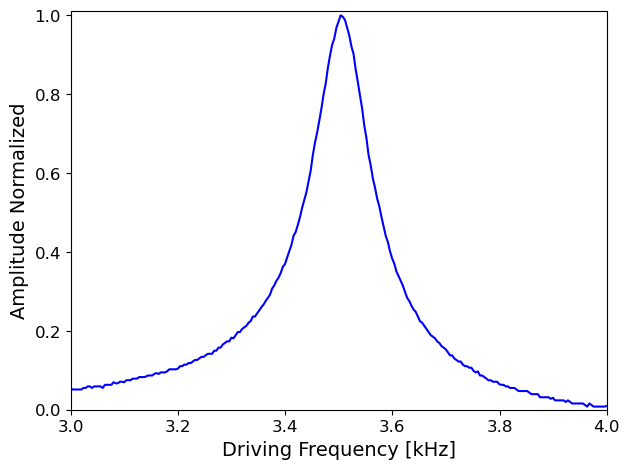

In [7]:
def lorentz(f):
    # f: frequency
    # w: FWHM
    # p0: position of maximum

    w = .16
    p0 = 3.505

    x = (f-p0)/(0.5*w)
    return 1/(1+x**2)

fit = lorentz(lorentx)

fig = plt.figure()
plt.plot(lorentx,lorenty,'b')
plt.xlabel('Driving Frequency [kHz]',fontsize=14)
plt.ylabel('Amplitude Normalized',fontsize=14)
plt.xlim(3,4)
plt.ylim(0,1.01)
plt.tick_params(labelsize=12)
#plt.plot(lorentx,fit)
plt.tight_layout()
#plt.savefig('Lorentzianplot.pdf')

## 1-D Resonance

xi^2: 5.4


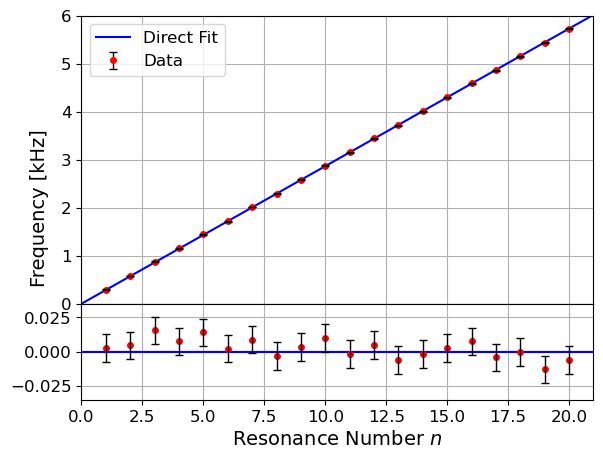

In [13]:
def soundfit(n):
    return 286.6*n

testresnum = np.array([0,22])
testresnumval = soundfit(testresnum) / 1000

soundfitval = soundfit(resnum) / 1000

residual = -1*soundfitval + resfreq/1000

diff = residual*1000
diff2 = diff**2
chi2 = sum(diff2)*.5/100
print(f'chi^2: {chi2:3.1f}')

fig = plt.figure(1)
frame1 = fig.add_axes((.1,.3,.8,.6))

plt.plot(testresnum,testresnumval,'b',label='Direct Fit')
plt.errorbar(resnum,resfreq/1000,yerr=.01,fmt='or',label='Data',barsabove=True,markersize=4,ecolor='black',zorder=3,elinewidth=1,capsize=3)
plt.xlim(0,21)
plt.ylim(0,6)
frame1.set_xticklabels([])
plt.grid()
plt.legend(fontsize=12)
plt.tick_params(labelsize=12)

frame2 = fig.add_axes((.1,.1,.8,.2))
plt.hlines(0,0,21,'r')
plt.errorbar(resnum,residual,yerr=.01,fmt='or',label='Data',barsabove=True,markersize=4,ecolor='black',zorder=3,elinewidth=1,capsize=3)
plt.grid()
plt.xlim(0,21)
plt.ylim(-.035,.035)
fig.supylabel('Frequency [kHz]',fontsize=14)
plt.xlabel(r'Resonance Number $n$',fontsize=14)
plt.hlines(0,0,21,'b')
plt.tick_params(labelsize=12)

#plt.savefig('1d_resonance.pdf')

## 3-D Resonance

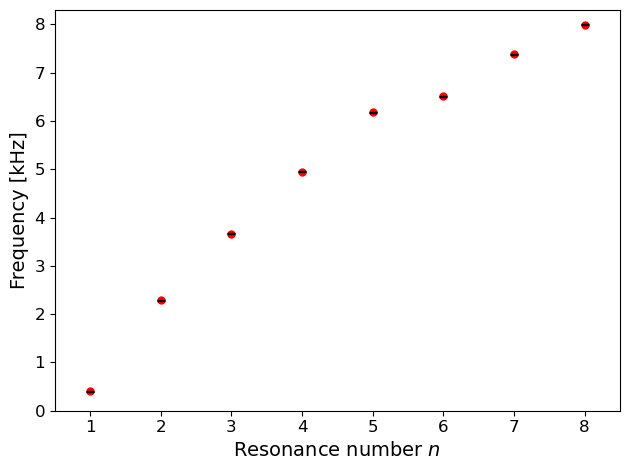

In [22]:
resnum3d = np.array([1,2,3,4,5,6,7,8])
resval3d = np.array([407,2285.3,3666.4,4946.8,6182,6514.1,7386.8,7990.3])

fig = plt.figure()

#plt.plot(resnum3d,resval3d,'ob')
plt.errorbar(resnum3d,resval3d/1000,yerr=.01,fmt='or',label='Data',barsabove=True,markersize=5,ecolor='black',zorder=3,elinewidth=1,capsize=3)
plt.xlim(0.5,8.5)
plt.ylim(0,8.3)
plt.xlabel(r'Resonance number $n$',fontsize=14)
plt.ylabel('Frequency [kHz]',fontsize=14)
plt.tick_params(labelsize=12)
plt.tight_layout()
#plt.savefig('3d_resonance.pdf')